# Data download for OMNI data from server

In [1]:
from viresclient import SwarmRequest
import hapiclient
from hapiclient.util import pythonshell
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import tqdm

import utils

In [7]:
###Define time parameters, and OMNI parameters.

### Time parameters
start_date = 1998
end_date   = 2025

start_date_str= f'{start_date}-01-01'
end_date_str=f'{end_date}-01-01'

year_range=pd.date_range(start_date_str, end_date_str, freq='1YS')

### OMNI parameters
server_hapi='https://cdaweb.gsfc.nasa.gov/hapi'

#1min data import parameters
dataset='OMNI_HRO2_1MIN'
parameters = 'BY_GSM,BZ_GSM,flow_speed,proton_density,T,Pressure'

#1hr data import parameters
datasethr    = 'OMNI2_H0_MRG1HR'
parametershr = 'KP1800,DST1800'

opts = {'usecache': True}

In [8]:
events_totmin=xr.Dataset()

############ data download loop
for year in tqdm.tqdm(year_range):
    
    #Define start and end of year.
    start=year
    end=year+pd.DateOffset(years=1, days=0)
    
    ## OMNI data download for this period.
    OMNIdata, OMNImeta = hapiclient.hapi(server_hapi, dataset, parameters, str(start)[:10], str(end)[:10], **opts)
    
    ## Remove bad data
    OMNIdata, OMNImeta = utils.fill2nan(OMNIdata, OMNImeta)
    
    ## Create xarray
    OMNIframe = pd.DataFrame(data=OMNIdata, columns=OMNIdata.dtype.names)
    
    ##Reformat the time column in utf-8 (currently in Bytes), and then set as index. hapitime to datetime function does not work otherwise!
    New_Time_Index=[]
    for i in OMNIframe['Time']:
        New_Time_Index.append(i.decode('utf-8')) ###Changing format of time index
    OMNIframe['Time'] = New_Time_Index
    OMNIframe = OMNIframe.set_index("Time")
    
    ##Using hapitime2datetime to reindex in correct format- hapitime different from datetime.
    OMNIframe.index= hapiclient.hapitime2datetime(OMNIframe.index.values)
    
    #TIMESHIFT    OMNIframe.index=OMNIframe.index+pd.Timedelta(OMNIshift) ####Timeshift function not in use.
    
    OMNIframe.index.name="Timestamp" ## To match same name as the viresclient index.
    OMNIset = utils.to_xarray(OMNIframe, OMNImeta) ##change into xarray for merge step.
    
    ## append OMNI dataset.
    events_totmin=xr.merge([events_totmin,OMNIset])

  0%|                                                                                                                                                                | 0/28 [00:00<?, ?it/s]/home/spiralwidget/.local/lib/python3.10/site-packages/hapiclient/hapitime.py:284: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()
  4%|█████▎                                                                                                                                               | 1/28 [06:24<2:52:49, 384.07s/it]/home/spiralwidget/.local/lib/python3.10/site-packages/hapiclient/hapitime.py:284: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future ve

In [9]:
events_tothr=xr.Dataset()

############ data download loop
for year in tqdm.tqdm(year_range):
    
    #Define start and end of year.
    start=year
    end=year+pd.DateOffset(years=1, days=0)
    
    ## OMNI data download for this period.
    OMNIdata, OMNImeta = hapiclient.hapi(server_hapi, datasethr, parametershr, str(start)[:10], str(end)[:10], **opts)
    
    ## Remove bad data
    #OMNIdata, OMNImeta = utils.fill2nan(OMNIdata, OMNImeta)
    
    ###FILL2NAN FUNCTION NOT USED. If dataset includes NaN data this will lead to problems. Not required for download
    ###of Kp, Dst.
    
    ## Create xarray
    OMNIframe = pd.DataFrame(data=OMNIdata, columns=OMNIdata.dtype.names)
    
    ##Reformat the time column in utf-8 (currently in Bytes), and then set as index. hapitime to datetime function does not work otherwise!
    New_Time_Index=[]
    for i in OMNIframe['Time']:
        New_Time_Index.append(i.decode('utf-8')) ###Changing format of time index
    OMNIframe['Time'] = New_Time_Index
    OMNIframe = OMNIframe.set_index("Time")
    
    ##Using hapitime2datetime to reindex in correct format- hapitime different from datetime.
    OMNIframe.index= hapiclient.hapitime2datetime(OMNIframe.index.values)
    
    #TIMESHIFT    OMNIframe.index=OMNIframe.index+pd.Timedelta(OMNIshift) ####Timeshift function not in use.
    
    OMNIframe.index.name="Timestamp" ## To match same name as the viresclient index.
    OMNIset = utils.to_xarray(OMNIframe, OMNImeta) ##change into xarray for merge step.
    
    ## append OMNI dataset.
    events_tothr=xr.merge([events_tothr,OMNIset])

  0%|                                                                                                                                                                | 0/28 [00:00<?, ?it/s]/home/spiralwidget/.local/lib/python3.10/site-packages/hapiclient/hapitime.py:284: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()
  4%|█████▍                                                                                                                                                  | 1/28 [00:02<01:17,  2.89s/it]/home/spiralwidget/.local/lib/python3.10/site-packages/hapiclient/hapitime.py:284: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future ve

<xarray.Dataset> Size: 811MB
Dimensions:         (Timestamp: 14480640)
Coordinates:
  * Timestamp       (Timestamp) object 116MB 883612800000000000 ... 175245114...
Data variables:
    BY_GSM          (Timestamp) float64 116MB 5.41 5.51 4.04 ... nan nan nan
    BZ_GSM          (Timestamp) float64 116MB 2.31 1.92 1.59 ... nan nan nan
    flow_speed      (Timestamp) float64 116MB 357.6 357.6 351.6 ... nan nan nan
    proton_density  (Timestamp) float64 116MB 6.85 6.85 4.74 ... nan nan nan
    T               (Timestamp) float64 116MB 1.007e+05 1.007e+05 ... nan nan
    Pressure        (Timestamp) float64 116MB 1.75 1.75 1.17 1.6 ... nan nan nan


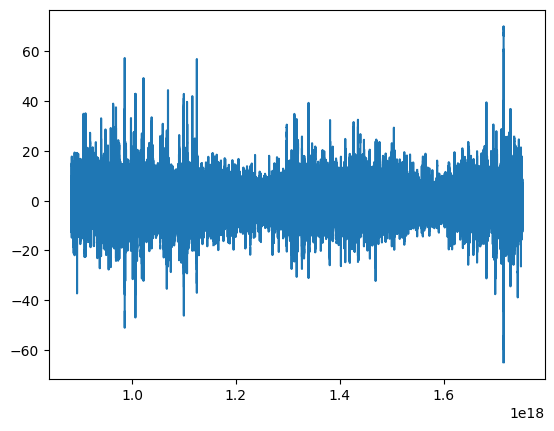

In [10]:
print(events_totmin)
plt.plot(events_totmin['Timestamp'],events_totmin['BY_GSM'])

<xarray.Dataset> Size: 6MB
Dimensions:    (Timestamp: 242943)
Coordinates:
  * Timestamp  (Timestamp) object 2MB 883614600000000000 ... 1758205800000000000
Data variables:
    KP1800     (Timestamp) float64 2MB 7.0 7.0 7.0 13.0 ... 99.0 99.0 99.0 99.0
    DST1800    (Timestamp) float64 2MB -9.0 -8.0 -9.0 -9.0 ... -7.0 -9.0 -11.0


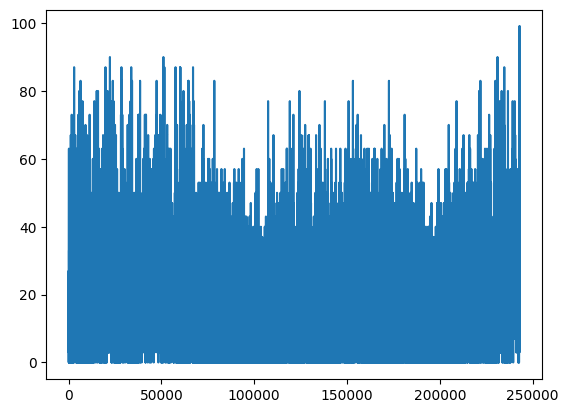

In [11]:
print(events_tothr)
plt.plot(events_tothr['KP1800'])

In [12]:
###To Do List. 
#1. Add Kp and Dst to the dataset export. TICK
#2. Interpolate Kp and Dst correctly. TICK
#3. See why Kp values are so high? 3, 7,10,27???
#4. Propogate through rest of pipeline.

In [13]:
#####Downsampling 1hr data by allocating value of Kp and Dst at the start of the hour to be the value 
#####used for the rest of that hour.

#tickers
ticker=0
bigticker=0

#seperate arrays from dataset.
KPhourly=np.array(events_tothr['KP1800'])
DSThourly=np.array(events_tothr['DST1800'])
Timestamp1min=np.array(events_totmin['Timestamp'])

#Empty objects to fill.
DST=[]
KP=[]

#Go through times for 1min data
for i in tqdm.tqdm(Timestamp1min):
    #add ticker
    ticker+=1
    
    #after every 1hr move on to next value in array.
    if ticker ==60:
        ticker=0
        bigticker+=1
        
        ###Have to add this exception loop for the last value of Kp, as it is out of range for the 1hr data.
        try:
            DST.append(DSThourly[bigticker])
            KP.append(KPhourly[bigticker])
        except:
            DST.append(DSThourly[-1])
            KP.append(KPhourly[-1])
    else:
        DST.append(DSThourly[bigticker])
        KP.append(KPhourly[bigticker])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14480640/14480640 [00:07<00:00, 1884971.40it/s]


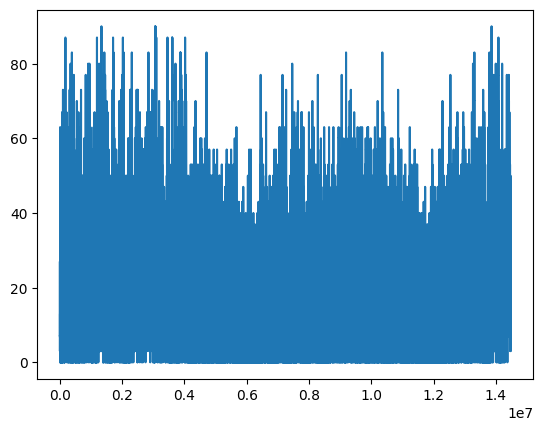

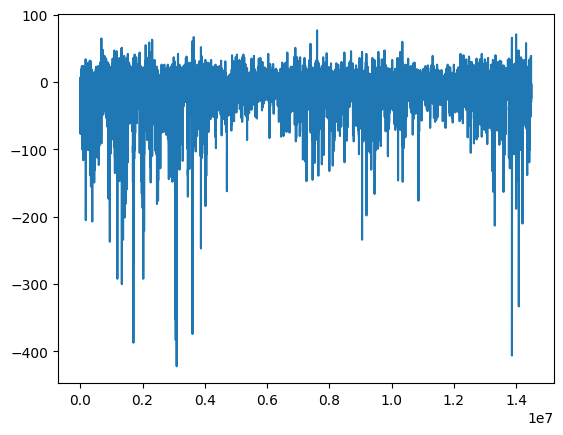

In [14]:
plt.plot(KP)
plt.show()
plt.plot(DST)
plt.show()

In [15]:
###Merge the two datasets.
events_totmin = events_totmin.assign(KP=('Timestamp', KP))
events_totmin = events_totmin.assign(DST=('Timestamp', DST))

In [16]:
print(events_totmin)

<xarray.Dataset> Size: 1GB
Dimensions:         (Timestamp: 14480640)
Coordinates:
  * Timestamp       (Timestamp) object 116MB 883612800000000000 ... 175245114...
Data variables:
    BY_GSM          (Timestamp) float64 116MB 5.41 5.51 4.04 ... nan nan nan
    BZ_GSM          (Timestamp) float64 116MB 2.31 1.92 1.59 ... nan nan nan
    flow_speed      (Timestamp) float64 116MB 357.6 357.6 351.6 ... nan nan nan
    proton_density  (Timestamp) float64 116MB 6.85 6.85 4.74 ... nan nan nan
    T               (Timestamp) float64 116MB 1.007e+05 1.007e+05 ... nan nan
    Pressure        (Timestamp) float64 116MB 1.75 1.75 1.17 1.6 ... nan nan nan
    KP              (Timestamp) float64 116MB 7.0 7.0 7.0 7.0 ... 30.0 30.0 13.0
    DST             (Timestamp) float64 116MB -9.0 -9.0 -9.0 ... -4.0 -4.0 -3.0


In [17]:
###Step 4: get current directory and set PATH variable to where data will be saved.

import os

# Get the current working directory
current_path = os.getcwd()

# Print the current working directory
print("Current working directory:", current_path)

#define path to data folder where data will be placed. Print current path if you don't know what it is!
PATH = current_path

Current working directory: /mnt/c/users/s1725621/Documents/PhDCode/Git/CrossformerTimeSeries/Data


In [18]:
###Step 5: save OMNI data.

###Save to netcdf file
events_totmin.to_netcdf(path = PATH+'OMNI'+str(start_date)[:4]+str(end_date)[:4]+'.nc')

###Save to csv file
# Convert xarray Dataset to pandas DataFrame
OMNIsetf = events_totmin.to_dataframe()

# Save the DataFrame to a CSV file
OMNIsetf.to_csv(PATH+'OMNI'+str(start_date)[:4]+str(end_date)[:4]+'.csv',index=True)